<a href="https://colab.research.google.com/github/shiva561/PyTorchLearnings/blob/main/EvenOdd_npynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Required Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


In [2]:
# Step 2: Create Input and Output Data (0 to 100)

# Input numbers (reshaped and normalized to range [0, 1])
X = torch.tensor([[i] for i in range(101)], dtype=torch.float32) / 100.0  # shape = (101, 1)

# Labels: 0 for even, 1 for odd
y = torch.tensor([[i % 2] for i in range(101)], dtype=torch.float32)  # shape = (101, 1)


In [3]:
# Step 3: Define the Neural Network Model
class EvenOddNet(nn.Module):
    def __init__(self):
        super(EvenOddNet, self).__init__()

        # 1 input → 8 neurons in hidden layer
        self.fc1 = nn.Linear(1, 8)
        # Hidden → 1 output neuron
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))          # ReLU activation
        x = torch.sigmoid(self.fc2(x))   # Sigmoid for binary output
        return x


In [4]:
# Step 4: Initialize Model, Loss Function, and Optimizer
model = EvenOddNet()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [5]:
# Step 5: Train the Model
for epoch in range(200):
    model.train()
    optimizer.zero_grad()

    output = model(X)             # Forward pass
    loss = criterion(output, y)   # Compute loss
    loss.backward()               # Backpropagation
    optimizer.step()              # Update weights

    if epoch % 40 == 0:
        print(f"Epoch {epoch} — Loss: {loss.item():.4f}")


Epoch 0 — Loss: 0.6939
Epoch 40 — Loss: 0.6935
Epoch 80 — Loss: 0.6935
Epoch 120 — Loss: 0.6934
Epoch 160 — Loss: 0.6934


In [6]:
# Step 6: Test the Model
model.eval()

with torch.no_grad():
    predictions = model(X).round()  # Round to 0 or 1
    print("\nPredicted even (0) or odd (1):")
    print(predictions.squeeze())  # Remove extra dimension

    # Bonus: Compare actual vs predicted
    correct = (predictions == y).sum().item()
    print(f"\nAccuracy: {correct}/101 = {correct/101*100:.2f}%")



Predicted even (0) or odd (1):
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Accuracy: 51/101 = 50.50%


In [7]:
losses = []
losses.append(loss.item())


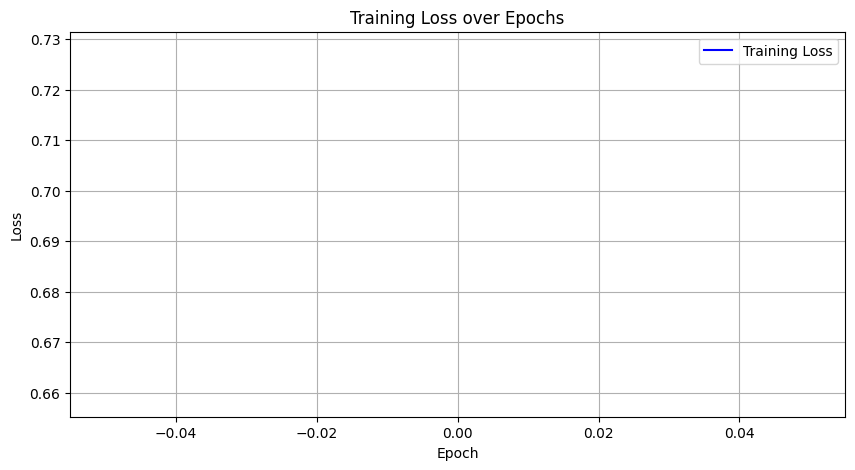

In [8]:
import matplotlib.pyplot as plt

# Plotting the training loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
